In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings
import matplotlib
warnings.filterwarnings('ignore')
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)

In [32]:
font_path = "C:\\Users\\AniltonCardoso\\OneDrive - BITKA\\Projetos\\CustomFonts"
from matplotlib import font_manager
font_dirs = [font_path]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    

In [33]:
csfont = {'fontname':'Roboto Condensed'}
hfont = {'fontname':'Roboto Condensed'}
matplotlib.rc('font',family='Roboto Condensed')
plt.rcParams.update({
    "text.usetex": False})

In [28]:
vals = []
vals2 = []
x = np.linspace(0, 0.05, 100)

for w in x:
    vals.append(((1 - w)**0.5 * (1 - 0.5*w)**(14/30) * (1 + 49*w)**(1/30)) - 1)
    vals2.append((1 - w) *0.5 + (1 - 0.5*w)*(14/30)  + (1 + 49*w)/30 - 1)

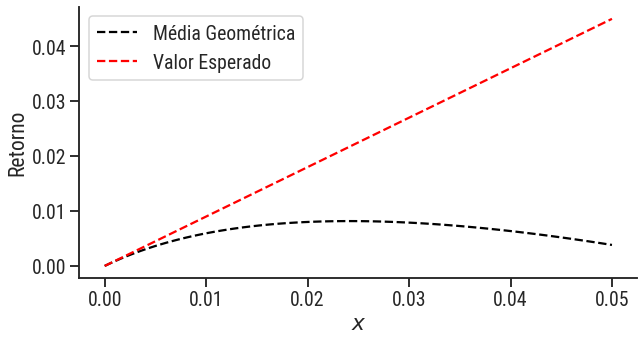

In [43]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(111)
plt.plot(x, vals, 'k--', label = 'Média Geométrica')
plt.plot(x, vals2, 'r--', label = 'Valor Esperado')


max = np.max(vals)
xmax = x[np.argmax(vals)]

ax.set_xlabel(r"$x$")
ax.set_ylabel("Retorno")


plt.legend()
plt.savefig("fig1.pdf")
sns.despine()

In [62]:
from pathlib import Path
import pandas as pd 
from datetime import datetime

In [58]:
ibov_diario = pd.read_csv(Path("C:/Users/AniltonCardoso/OneDrive - BITKA/Mestrado/202102/Finanças Quantitativas/Listas/IBOV.csv"), parse_dates = ['Date'])
ibov_mensal = pd.read_csv(Path("C:/Users/AniltonCardoso/OneDrive - BITKA/Mestrado/202102/Finanças Quantitativas/Listas/IBOVmensal.csv"), parse_dates = ['Date'])

In [108]:
df_2020 = ibov_diario[(ibov_diario['Date'] >= "2020-01-01")]


In [109]:
drop_cols = ['Date', "IBOV", "BOVA11"]
def drop(df, cols):
    return df.drop(cols, axis = 1)

In [249]:
df_2019 = ibov_diario[(ibov_diario['Date'] >= "2019-01-01") & (ibov_diario['Date'] <= "2020-01-02")]
df_2019 = drop(df_2019, ['Date'])

returns_2019 = df_2019 / df_2019.shift(1)
returns_2019.dropna(inplace = True)

In [250]:
corr_matrix = returns_2019.corr()
cors_2019 = corr_matrix.iloc[0, 1:]

In [251]:
print(cors_2019.index[cors_2019.argmax()], cors_2019.iloc[cors_2019.argmax()])
print(cors_2019.index[cors_2019.argmin()], cors_2019.iloc[cors_2019.argmin()])
print('media', cors_2019.mean())
print('itub', cors_2019['ITUB4'])

BOVA11 0.9894963667790604
SUZB3 0.16978287446585485
media 0.5065495102949973
itub 0.7412274406317493


In [232]:
df_2020 = ibov_diario[(ibov_diario['Date'] >= "2020-01-01")]
df_2020 = drop(df_2020, ['Date'])
returns_2020 = df_2020 / df_2020.shift(1)
returns_2020.dropna(inplace = True)

In [233]:
corr_matrix = returns_2020.corr()
cors_2020 = corr_matrix.iloc[0, 1:]

In [234]:
print(cors_2020.index[cors_2020.argmax()], cors_2020.iloc[cors_2020.argmax()])
print(cors_2020.index[cors_2020.argmin()], cors_2020.iloc[cors_2020.argmin()])
print('media', cors_2020.mean())
print('itub', cors_2020['ITUB4'])

BOVA11 0.992478924582425
SUZB3 0.3503534492163705
media 0.7695246273268778
itub 0.8449601570047979


<Figure size 720x360 with 0 Axes>

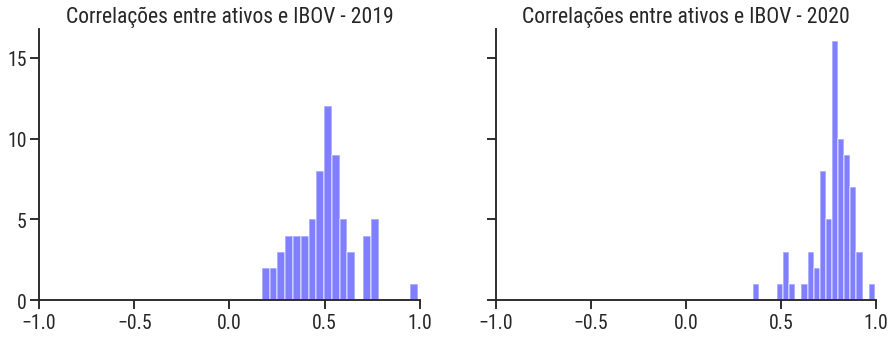

In [252]:
fig = plt.figure(figsize = (10,5))
fig, ax = plt.subplots(1, 2, figsize = (15,5), sharey = True)

ax[0].hist(cors_2019, bins = 20, color = 'blue', alpha = 0.5, label = '2019')
ax[0].set_xlim((-1,1))
ax[0].set_title("Correlações entre ativos e IBOV - 2019")
ax[1].hist(cors_2020, bins = 20,  color = 'blue', alpha = 0.5, label = '2019')
ax[1].set_xlim((-1,1))
_ = ax[1].set_title("Correlações entre ativos e IBOV - 2020")

plt.savefig("fig2.pdf")
sns.despine()

In [265]:
portfolio = ibov_diario[['BOVA11', "ABEV3", "SUZB3", 'ITSA4', 'PETR4']]
portfolio = portfolio.iloc[-251:]
returns = portfolio / portfolio.shift(1)
returns.dropna(inplace = True)

In [271]:
weight = 1/5.0

In [273]:
returns['Portfolio'] = [0] * len(returns)
weight = 1/5.0

for col in returns.columns:
    if col == "Portfolio":
        continue
    returns['Portfolio'] += returns[col]  * weight

In [290]:
returns.kurtosis()

BOVA11       10.585434
ABEV3         7.570052
SUZB3         4.876933
ITSA4         2.944303
PETR4        16.718933
Portfolio    12.842249
dtype: float64

In [281]:
from scipy.stats import kurtosis

In [284]:
kurtosis(returns['BOVA11'])

10.351003378356063

In [295]:
250*0.05

12.5

<AxesSubplot:>

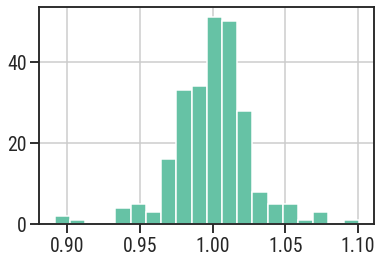

In [289]:
returns['ITSA4'].hist(bins = 20)

In [301]:
returns.quantile([0.05]) - 1

,BOVA11,ABEV3,SUZB3,ITSA4,PETR4,Portfolio
0.05,-0.036755,-0.040841,-0.050007,-0.045305,-0.038984,-0.028252


In [300]:
returns['BOVA11'].sort_values().iloc[12:14]

3293    0.962958
3273    0.963596
Name: BOVA11, dtype: float64